IMPORT LIBRARIES AND DATASET

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
#dataset
df=pd.read_csv("signal-data (1).csv") 
df.head()
print(df)
df.shape
# df.plot(kind='box')
# plt.show()

                     Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...       581     582     583     58

(1567, 592)

DATA CLEANING AND PREPROCESSING

In [17]:
df.describe()
print("----------------------")
df.info()
print("----------------------")
df.columns
print("----------------------")

df.isnull().sum()

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

categorical_cols = df.select_dtypes(include=[object]).columns
if not categorical_cols.empty:  # Check if there are any categorical columns
    for col in categorical_cols:
        mode_values = df[col].mode()
        if not mode_values.empty:
            df[col].fillna(mode_values.iloc[0], inplace=True)
        else:
            print(f"No mode for column {col}")
else:
    print("No categorical columns found.")

df

----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
----------------------
----------------------


C:\Users\awans\AppData\Local\Temp\ipykernel_19644\850965077.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_values.iloc[0], inplace=True)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,...,203.172000,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,...,97.934373,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,...,43.523100,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,...,93.494100,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


DATA VISUALIZATION

Statistical Summary:
                  0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.209271     0.008936     0.073849     0.015107  ...   
min     100.0  

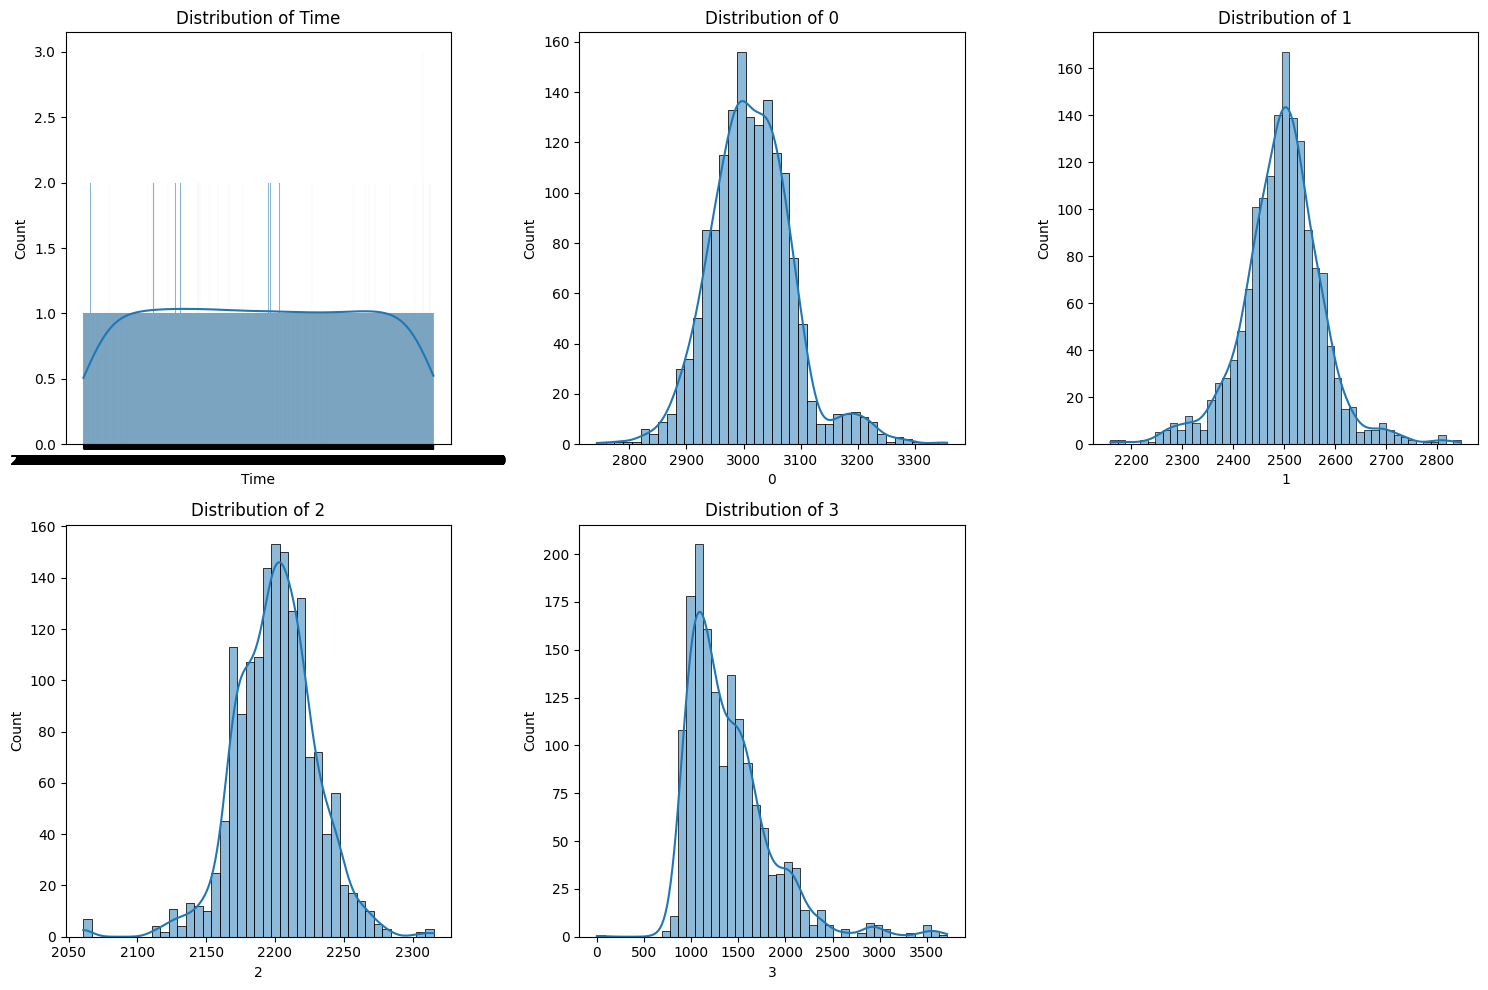

In [18]:
# Detailed statistical analysis
print("Statistical Summary:\n", df.describe())

import seaborn as sns
import matplotlib.pyplot as plt
first_five_cols = df.columns[:5]
target_col=df.columns[-1]
plt.figure(figsize=(15, 10))
for i, col in enumerate(first_five_cols,1):
    plt.subplot(2, 3, i)  # Create subplots
    sns.histplot(df[col], kde=True)  # Histogram with Kernel Density Estimate
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)
int64


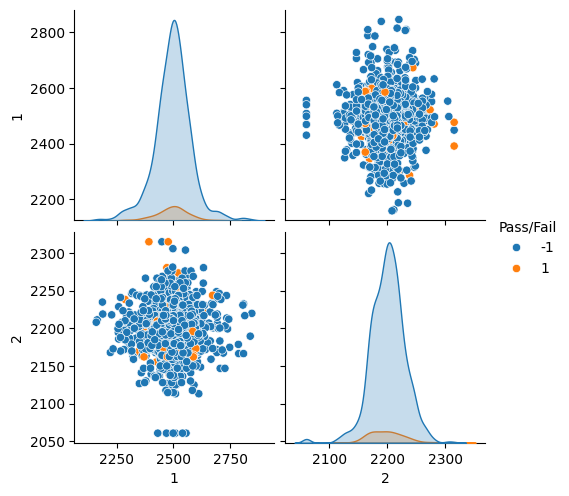

In [19]:

print(df.columns)
print(df['Pass/Fail'].dtype)
df['Pass/Fail'] = df['Pass/Fail'].astype('category')
subset = df[['Time', '1', '2', 'Pass/Fail']]  # Replace with actua
sns.pairplot(subset, hue='Pass/Fail')
plt.show()



In [20]:
X = df.drop(columns=['Pass/Fail'])
y = df['Pass/Fail']
print("Target Class Distribution:\n", y.value_counts())
from sklearn.utils import resample


df_majority = df[df['Pass/Fail'] == -1]
df_minority = df[df['Pass/Fail'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=df_majority.shape[0],
                                 random_state=42)

data_balanced = pd.concat([df_majority, df_minority_upsampled])
X = data_balanced.drop(columns=['Pass/Fail'])
y = data_balanced['Pass/Fail']


Target Class Distribution:
 Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


In [21]:
df['Pass/Fail'].dtypes

CategoricalDtype(categories=[-1, 1], ordered=False, categories_dtype=int64)

In [22]:
data_balanced['Pass/Fail'] = data_balanced['Pass/Fail'].replace({-1:1,1:0})
data_balanced['Pass/Fail']

C:\Users\awans\AppData\Local\Temp\ipykernel_19644\3536390409.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_balanced['Pass/Fail'] = data_balanced['Pass/Fail'].replace({-1:1,1:0})


0       1
1       1
3       1
4       1
5       1
       ..
924     0
40      0
235     0
167     0
1238    0
Name: Pass/Fail, Length: 2926, dtype: category
Categories (2, int64): [1, 0]

In [26]:
data_balanced['Time']=pd.to_datetime(data_balanced['Time'])
data_balanced['year'] = data_balanced['Time'].dt.year
data_balanced['month'] = data_balanced['Time'].dt.month
data_balanced['day'] = data_balanced['Time'].dt.day
data_balanced['hour'] = data_balanced['Time'].dt.hour
data_balanced['minute'] = data_balanced['Time'].dt.minute
data_balanced['second'] = data_balanced['Time'].dt.second

data_balanced['year'] = data_balanced['year'].astype(float) 
data_balanced['month'] = data_balanced['month'].astype(float) 
data_balanced['day'] = data_balanced['day'].astype(float) 
data_balanced['hour'] = data_balanced['hour'].astype(float) 
data_balanced['minute'] = data_balanced['minute'].astype(float) 
data_balanced['second'] = data_balanced['second'].astype(float) 

data_balanced= data_balanced.drop('Time',axis=1)

X = data_balanced.drop(columns=['Pass/Fail'])
y = data_balanced['Pass/Fail']



C:\Users\awans\AppData\Local\Temp\ipykernel_19644\2514275081.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_balanced['year'] = data_balanced['Time'].dt.year
C:\Users\awans\AppData\Local\Temp\ipykernel_19644\2514275081.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_balanced['month'] = data_balanced['Time'].dt.month
C:\Users\awans\AppData\Local\Temp\ipykernel_19644\2514275081.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X , y ,test_size=0.3,random_state=42,stratify=y)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)